In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
boston = load_boston()

/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [68]:
print(boston.DESCR) # we will predict MEDV (median value of owner-ocuppied homes in $1000's)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [69]:
X = np.array(boston.data[:,5]) #we get all the files of the column 5 (average number of rooms per dwelling)
Y = np.array(boston.target) #median value

# Convert the data in matrix


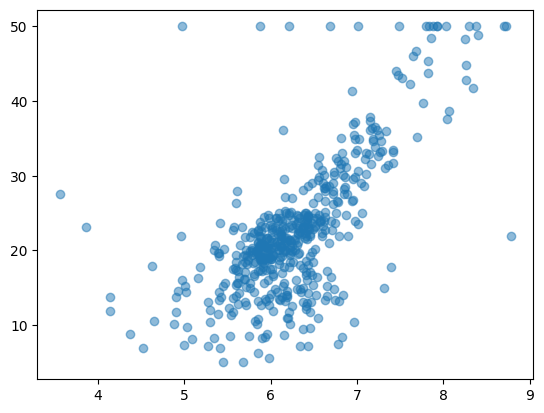

In [70]:
plt.scatter(X,Y,alpha=.5) #Alpha -> transparency
plt.show()

In [71]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 10)

In [72]:
lr = LinearRegression()
model = lr.fit(X_train,Y_train)

In [73]:
Y_pred = model.predict(X_test)

In [74]:
mse_ = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2_ = r2_score(Y_test,Y_pred)
print(mse_)
print(r2_)

6.752920440468987
0.5639547666771445


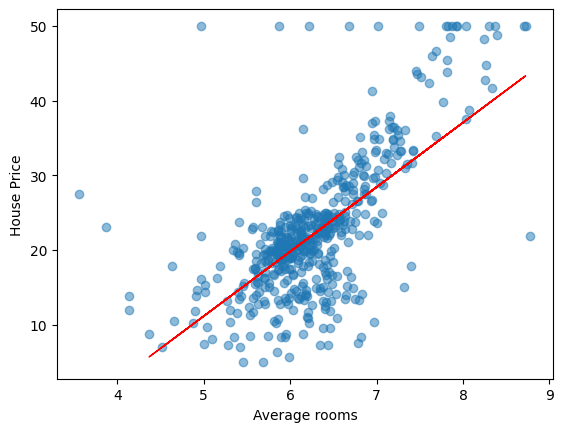

In [35]:
plt.scatter(X,Y,alpha=.5) #Alpha -> transparency
plt.plot(X_test,Y_pred,color="red", linewidth=1,label="Predictor")
plt.xlabel("Average rooms")
plt.ylabel("House Price")
plt.show()

In [37]:
# Trying with more features

In [39]:
import pandas as pd

In [76]:
boston_data = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_data.head()
selected_data = boston_data[["CRIM","RM"]] # SELECT TWO FEATURES
X = selected_data
Y = boston.target

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [78]:
print(X_train.shape) #354 rows, 2 cols

(354, 2)


In [79]:
model = LinearRegression()
model = model.fit(X_train,y_train)

In [80]:
importance = model.coef_
print("Importance ",importance)

Importance  [-0.29766746  8.19562256]


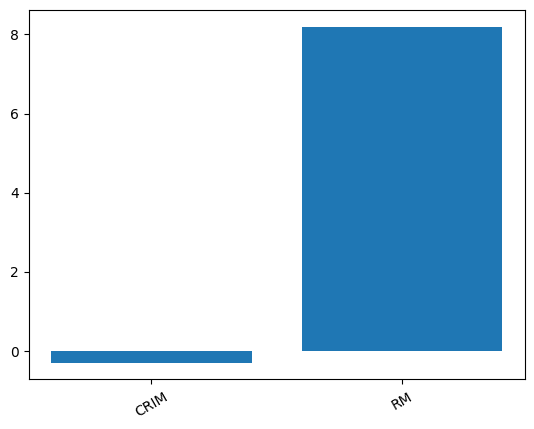

In [81]:
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], X.columns.values.tolist(),rotation=30)
plt.show()

In [82]:
y_train_predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2 = r2_score(y_train,y_train_predict)
print("Rmse: ", rmse)
print("R2: ", r2)

Rmse:  6.118665451998305
R2:  0.5181454264518104


### Conclusión: Agregar variables no siempre es bueno para la predicción del modelo

En este caso, al agregar el indice de criminalidad vemos que el error cuadrático medio disminuye pero tambien dii